## Udacity Data Analyst Nanodegree Project 1 "Test a Perceptual Phenomenon"

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

1. What is our dependent variable?  What is our independent variable?
  - Independent Variable: Condition (congruent or incongruent words)
  - Dependent Variable: Time required to name the ink colors, which we will term "reaction time"
  
2. What is an appropriate set of hypothesis for this task? What kind of statistical test do you expect to perform?

The appropriate set of hypothesis for this task consists of the null (H0) and alternative hypothesis (HA).  Specifically, I set the null hypothesis to state that there is no difference in the response, as represented by mean reaction time, between populations performing the task under congruent and incongruent conditions.  The alternative hypothesis is that the population performing the task under the incongruent condition results in a slower response, or increased mean reaction time, than the that of the congruent condition.  This is expressed mathematically below. 

  - $\mu_c$ = mean reaction time for the congruent test condition
  - $\mu_i$ = mean reaction time for the incongruent test condition

  - **H0**: $\mu_c - \mu_i$ = 0 (condition does not affect reaction time)
  - **Ha** = $\mu_c - \mu_i$ < 0 (incongruent condition has an increased reaction time relative to the congruent condition)
  
Rather than having data from an entire population or populations, we have data from practically sized samples, 24 individuals performing the task under each condition.  The purpose of performing the hypothesis test is to determine whether there is enough evidence in the sample(s) to make inferences about a condition for the entire population.  In other words we are trying to determine whether the sample means are different because the two populations/population means are actually different or if the observed differences are due to chance.  To accomplish this we will calculate a test statistic and determine the probability (p-value) of observing a result at least as extreme as this, purely by chance (p-value <= alpha).

This brings us to our next decision. What statistical test should we use?  What test statistic should be calcuating? Typically appropriate tests are the z test and the t test.  Z tests are best used when we either know the $\sigma$ of the population(s) under study or with sample sizes of at least 30 subjects.  For smaller sample sizes and an unknown $\sigma$ a t test is more appropriate.  
  
 For this study, each subject is exposed to the task under both conditions and the alternative hypothesis states that subjects will have an increased reaction time under incongruent condition relative to the congruent condition.  Considering this, it is appropriate to use a one-sided, paired (dependent) t test.  The paired t test carries the following assumptions:
 
 - The dependent variable is measured on a continuous scale (assumption met)
 - The independent variable should consist of two categorical related groups/mathced pairs (assumption met)
 - There should be no significant outliers in the differences between the two groups (assumption met)
 - The distribution of the differences in the dependent variable between the two groups is approximately normal (indeterminate but the t test is robust to violations of normality)

Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [19]:
import pandas as pd
%pylab inline
from scipy import stats, integrate
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import scipy as sp
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv(r'stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df['difference'] = df.Congruent - df.Incongruent 
df.head()

,Congruent,Incongruent,difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [4]:
desc = df.describe()
desc

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


In [5]:
df.Congruent.median()

14.3565

In [6]:
df.Incongruent.median()

21.0175

In [7]:
df.difference.median()

-7.666499999999999

In [8]:
desc_diff = desc.difference

In [9]:
# arrays of pertinent stats from the descriptive statistics DataFrame

n = len(df) # 24
means = desc_diff.loc['mean']
stdevs = desc_diff.loc['std']
SEs = stdevs/sqrt(n)
t_stats = means/SEs
p_stats = sp.stats.t.sf(abs(t_stats), 23) # n -1 = 23
MEs = 1.714 * SEs # t crtical 95% for 23 df = 1.697
CIs_lower = means - MEs
CIs_upper = means + MEs

In [10]:
print('t_stat: {} \n p_value: {} \n CI_lower: {} \n CI_upper: {}'.format(t_stats, p_stats, CIs_lower, CIs_upper))

t_stat: -8.02070694411 
 p_value: 2.05150029286e-08 
 CI_lower: -9.66684274668 
 CI_upper: -6.26274058666


In [11]:
melted = pd.melt(df.drop(['difference'], axis = 1))
melted.head()

,variable,value
0,Congruent,12.079
1,Congruent,16.791
2,Congruent,9.564
3,Congruent,8.630
4,Congruent,14.669


In [12]:
sns.set(rc={"figure.figsize": (10, 8)}, color_codes= True)

In [13]:
def vis_dist(type_vis):
    
    
    '''
    Produce any of three visualizations of the stroop effect data distribution.
    type_vis == 'histogram', returns a frequency distribution
    type_vis == 'histogram/pdf', returns a frequency distribution with pdf overlay
    type_vis == 'box', returns a box plot
    type_vis == 'violin', returns a violin plot
    This function uses Seaborn to produce the plots, so the Seaborn library must be installed.
    '''
    
    if type_vis == 'histogram':
        sns.distplot(df.Congruent, rug = True, kde = False, label= 'Congruent')
        sns.distplot(df.Incongruent, rug = True, kde= False, label = "Incongruent", axlabel= None)
        plt.legend(prop={'size':16})
        
    elif type_vis == 'histogram/pdf':
        sns.distplot(df.Congruent, rug = True, label= 'Congruent')
        sns.distplot(df.Incongruent, rug = True, label = "Incongruent", axlabel= None)
        plt.legend(prop={'size':16})
    
    elif type_vis == 'box':
        sns.boxplot(x = 'value', y = 'variable', data = melted, hue = 'variable')
        plt.legend(prop = {'size':16})
        
    
    elif type_vis == 'violin':
        sns.violinplot(x = 'value', y = 'variable', data = melted, hue = 'variable',
              bw=.1, scale="count", scale_hue=False, inner = None)

        plt.legend(prop = {'size': 16})
        
    else:
        print("Not a valid visualization type argument, pick 'histogram', 'box', or 'violin'")

In [14]:
from ipywidgets import interact

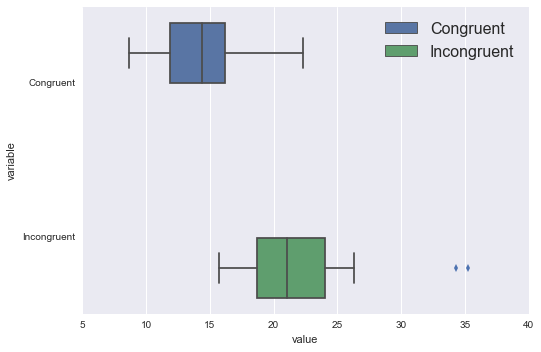

In [15]:
'''Viewing interactive plots requires a connection to the ipython kernel and therefore use of the actual .ipynb vs
this html export.  I selected a box plot for export but the notebook offers the choices in list below'''

i1 = interact(vis_dist, type_vis = ["histogram", "histogram/pdf","box", "violin"])

Each plot type tells a similiar story, the incongruent task times are of higher range than the congruent task times.  This is best viewed as a box plot, where we can see that the majority of the incongruent times are above the congruent IQR. Likewise, the majority of the congruent data is at or below the the first and second quartiles of the incongruent range.  It is also intersting to note that the there are two outliers in the incongruent task sample, with response times of ~ 35 minutes.

Let's also look at the distribution of the differences between the two samples.

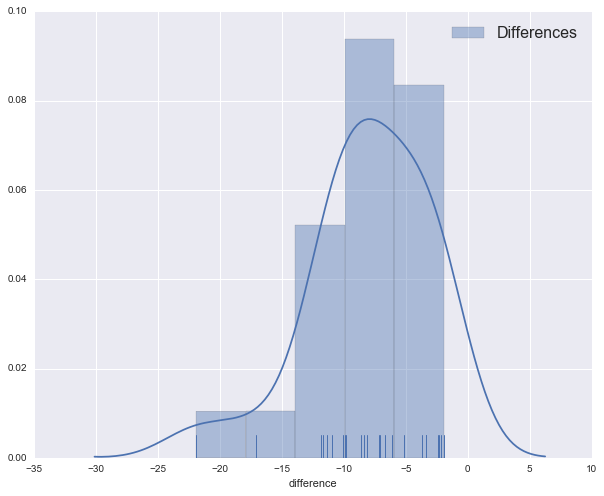

In [18]:
sns.distplot(df.difference, rug = True, label= 'Differences')
plt.legend(prop={'size':16})

This does appear to "approximate" a normal distribution with no signifcant outliers.

- **Significance Level**: .05
- **T Statistic**: -8.02
- **P Value**: < .0001 # holy catfish!

P is < alpha, therefore I reject the null hypothesis in favor of the alternative hypothesis.  There is a signficant difference in response time between the congruent and incongruent conditions.  Specifically, the incongruent response time is less than that of the congruent response time.  This result matched my expectations, both intuitively (the incongruent condition seems difficult) and from the visualizations of the sample distributions.

### References

- [Minitab Blog](http://blog.minitab.com/)
- [SPSS Tutorials](https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php)
- Reviewer guidance